## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import bostonDataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np
from pytorch_tabnet.tab_model import TabNetRegressor

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.1
bias = 1


## Dataset 


In [5]:
#Parameters 
n_features = 13
n_samples= 506
n_target = 1 

In [6]:
X,Y = bostonDataset.boston_data()

         X1        X2        X3        X4        X5        X6        X7  \
0 -0.419782  0.284830 -1.287909 -0.272599 -0.144217  0.413672 -0.120013   
1 -0.417339 -0.487722 -0.593381 -0.272599 -0.740262  0.194274  0.367166   
2 -0.417342 -0.487722 -0.593381 -0.272599 -0.740262  1.282714 -0.265812   
3 -0.416750 -0.487722 -1.306878 -0.272599 -0.835284  1.016303 -0.809889   
4 -0.412482 -0.487722 -1.306878 -0.272599 -0.835284  1.228577 -0.511180   

         X8        X9       X10       X11       X12       X13         Y  
0  0.140214 -0.982843 -0.666608 -1.459000  0.441052 -1.075562  0.159686  
1  0.557160 -0.867883 -0.987329 -0.303094  0.441052 -0.492439 -0.101524  
2  0.557160 -0.867883 -0.987329 -0.303094  0.396427 -1.208727  1.324247  
3  1.077737 -0.752922 -1.106115  0.113032  0.416163 -1.361517  1.182758  
4  1.077737 -0.752922 -1.106115  0.113032  0.441052 -1.026501  1.487503  


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model

Y_train = np.reshape(Y_train, (-1, 1))
Y_test = np.reshape(Y_test, (-1, 1))

prior_model = TabNetRegressor(optimizer_fn=torch.optim.Adam, optimizer_params=dict(lr = 0.01),
          #scheduler_params={"step_size":10, ], "gamma":0.9},
          #scheduler_fn=torch.optim.lr_scheduler.StepLR
          )  #TabNetRegressor()

prior_model.fit(X_train,Y_train,eval_set=[(X_train, Y_train)],
            eval_name=['train'], 
            eval_metric=[ 'mse', 'mae'], 
            max_epochs = n_epochs, 
            batch_size = batch_size,
            patience=50
            )

Device used : cpu


epoch 0  | loss: 2.06209 | train_mse: 1.17286 | train_mae: 0.81214 |  0:00:00s


epoch 1  | loss: 0.93752 | train_mse: 0.96535 | train_mae: 0.70874 |  0:00:00s


epoch 2  | loss: 0.62754 | train_mse: 0.65675 | train_mae: 0.5804  |  0:00:01s


epoch 3  | loss: 0.50211 | train_mse: 0.51569 | train_mae: 0.51771 |  0:00:01s


epoch 4  | loss: 0.52455 | train_mse: 0.44127 | train_mae: 0.45934 |  0:00:02s


epoch 5  | loss: 0.47693 | train_mse: 0.39406 | train_mae: 0.43804 |  0:00:02s


epoch 6  | loss: 0.45866 | train_mse: 0.34288 | train_mae: 0.41187 |  0:00:02s


epoch 7  | loss: 0.34465 | train_mse: 0.32143 | train_mae: 0.38527 |  0:00:03s


epoch 8  | loss: 0.36157 | train_mse: 0.26825 | train_mae: 0.36847 |  0:00:03s


epoch 9  | loss: 0.3172  | train_mse: 0.25855 | train_mae: 0.36248 |  0:00:04s


epoch 10 | loss: 0.28192 | train_mse: 0.34217 | train_mae: 0.36367 |  0:00:04s


epoch 11 | loss: 0.31022 | train_mse: 0.25324 | train_mae: 0.37643 |  0:00:04s


epoch 12 | loss: 0.27374 | train_mse: 0.2675  | train_mae: 0.36202 |  0:00:05s


epoch 13 | loss: 0.27808 | train_mse: 0.32332 | train_mae: 0.36424 |  0:00:05s


epoch 14 | loss: 0.23706 | train_mse: 0.16925 | train_mae: 0.29223 |  0:00:05s


epoch 15 | loss: 0.23528 | train_mse: 0.16574 | train_mae: 0.29414 |  0:00:06s


epoch 16 | loss: 0.28136 | train_mse: 0.15349 | train_mae: 0.27868 |  0:00:06s


epoch 17 | loss: 0.23186 | train_mse: 0.19848 | train_mae: 0.30986 |  0:00:07s


epoch 18 | loss: 0.2355  | train_mse: 0.15908 | train_mae: 0.28247 |  0:00:07s


epoch 19 | loss: 0.23102 | train_mse: 0.1515  | train_mae: 0.26858 |  0:00:07s


epoch 20 | loss: 0.21531 | train_mse: 0.14805 | train_mae: 0.26828 |  0:00:08s


epoch 21 | loss: 0.24198 | train_mse: 0.15551 | train_mae: 0.27818 |  0:00:08s


epoch 22 | loss: 0.23617 | train_mse: 0.15607 | train_mae: 0.28383 |  0:00:08s


epoch 23 | loss: 0.21384 | train_mse: 0.14885 | train_mae: 0.27545 |  0:00:09s


epoch 24 | loss: 0.23379 | train_mse: 0.18187 | train_mae: 0.28231 |  0:00:10s


epoch 25 | loss: 0.21776 | train_mse: 0.15235 | train_mae: 0.27417 |  0:00:11s


epoch 26 | loss: 0.22779 | train_mse: 0.14145 | train_mae: 0.26985 |  0:00:11s


epoch 27 | loss: 0.20772 | train_mse: 0.13456 | train_mae: 0.26214 |  0:00:11s


epoch 28 | loss: 0.16549 | train_mse: 0.14764 | train_mae: 0.27058 |  0:00:12s


epoch 29 | loss: 0.19293 | train_mse: 0.12301 | train_mae: 0.2537  |  0:00:12s


epoch 30 | loss: 0.2128  | train_mse: 0.14666 | train_mae: 0.26717 |  0:00:12s


epoch 31 | loss: 0.19284 | train_mse: 0.1233  | train_mae: 0.26093 |  0:00:13s


epoch 32 | loss: 0.1463  | train_mse: 0.10833 | train_mae: 0.24562 |  0:00:13s


epoch 33 | loss: 0.22413 | train_mse: 0.1584  | train_mae: 0.2751  |  0:00:14s


epoch 34 | loss: 0.19584 | train_mse: 0.13055 | train_mae: 0.24717 |  0:00:14s


epoch 35 | loss: 0.16124 | train_mse: 0.11236 | train_mae: 0.24026 |  0:00:14s


epoch 36 | loss: 0.1837  | train_mse: 0.11787 | train_mae: 0.23955 |  0:00:15s


epoch 37 | loss: 0.2047  | train_mse: 0.12781 | train_mae: 0.25178 |  0:00:15s


epoch 38 | loss: 0.20761 | train_mse: 0.11326 | train_mae: 0.23869 |  0:00:16s


epoch 39 | loss: 0.18674 | train_mse: 0.11307 | train_mae: 0.23492 |  0:00:16s


epoch 40 | loss: 0.20955 | train_mse: 0.12406 | train_mae: 0.24995 |  0:00:16s


epoch 41 | loss: 0.15066 | train_mse: 0.12556 | train_mae: 0.24478 |  0:00:17s


epoch 42 | loss: 0.16487 | train_mse: 0.14863 | train_mae: 0.25952 |  0:00:17s


epoch 43 | loss: 0.19985 | train_mse: 0.13113 | train_mae: 0.25748 |  0:00:17s


epoch 44 | loss: 0.15085 | train_mse: 0.13618 | train_mae: 0.26103 |  0:00:18s


epoch 45 | loss: 0.227   | train_mse: 0.12781 | train_mae: 0.25509 |  0:00:18s


epoch 46 | loss: 0.18658 | train_mse: 0.10668 | train_mae: 0.23472 |  0:00:19s


epoch 47 | loss: 0.1615  | train_mse: 0.10179 | train_mae: 0.23332 |  0:00:19s


epoch 48 | loss: 0.15828 | train_mse: 0.111   | train_mae: 0.23369 |  0:00:19s


epoch 49 | loss: 0.21443 | train_mse: 0.13107 | train_mae: 0.25847 |  0:00:20s


epoch 50 | loss: 0.1616  | train_mse: 0.10723 | train_mae: 0.2388  |  0:00:20s


epoch 51 | loss: 0.24658 | train_mse: 0.11541 | train_mae: 0.24195 |  0:00:20s


epoch 52 | loss: 0.18317 | train_mse: 0.11384 | train_mae: 0.24527 |  0:00:21s


epoch 53 | loss: 0.19709 | train_mse: 0.11596 | train_mae: 0.24574 |  0:00:21s


epoch 54 | loss: 0.15366 | train_mse: 0.10769 | train_mae: 0.22979 |  0:00:22s


epoch 55 | loss: 0.14719 | train_mse: 0.09444 | train_mae: 0.22608 |  0:00:22s


epoch 56 | loss: 0.13006 | train_mse: 0.0902  | train_mae: 0.22373 |  0:00:22s


epoch 57 | loss: 0.14426 | train_mse: 0.104   | train_mae: 0.23176 |  0:00:23s


epoch 58 | loss: 0.16015 | train_mse: 0.09362 | train_mae: 0.22923 |  0:00:23s


epoch 59 | loss: 0.1695  | train_mse: 0.09239 | train_mae: 0.22512 |  0:00:23s


epoch 60 | loss: 0.17196 | train_mse: 0.088   | train_mae: 0.22523 |  0:00:24s


epoch 61 | loss: 0.15917 | train_mse: 0.08995 | train_mae: 0.2271  |  0:00:24s


epoch 62 | loss: 0.15589 | train_mse: 0.09442 | train_mae: 0.23156 |  0:00:25s


epoch 63 | loss: 0.19925 | train_mse: 0.10314 | train_mae: 0.24227 |  0:00:25s


epoch 64 | loss: 0.1537  | train_mse: 0.09282 | train_mae: 0.22874 |  0:00:25s


epoch 65 | loss: 0.12737 | train_mse: 0.08887 | train_mae: 0.22062 |  0:00:26s


epoch 66 | loss: 0.15989 | train_mse: 0.10205 | train_mae: 0.23245 |  0:00:26s


epoch 67 | loss: 0.16997 | train_mse: 0.09145 | train_mae: 0.22277 |  0:00:26s


epoch 68 | loss: 0.20992 | train_mse: 0.08695 | train_mae: 0.21348 |  0:00:27s


epoch 69 | loss: 0.11072 | train_mse: 0.09564 | train_mae: 0.23029 |  0:00:27s


epoch 70 | loss: 0.13838 | train_mse: 0.09398 | train_mae: 0.22236 |  0:00:28s


epoch 71 | loss: 0.14252 | train_mse: 0.09143 | train_mae: 0.22573 |  0:00:28s


epoch 72 | loss: 0.15754 | train_mse: 0.09496 | train_mae: 0.23073 |  0:00:28s


epoch 73 | loss: 0.13715 | train_mse: 0.08059 | train_mae: 0.21447 |  0:00:29s


epoch 74 | loss: 0.12773 | train_mse: 0.07544 | train_mae: 0.20187 |  0:00:29s


epoch 75 | loss: 0.1415  | train_mse: 0.08443 | train_mae: 0.22077 |  0:00:29s


epoch 76 | loss: 0.13204 | train_mse: 0.08324 | train_mae: 0.21421 |  0:00:30s


epoch 77 | loss: 0.13291 | train_mse: 0.08357 | train_mae: 0.21569 |  0:00:30s


epoch 78 | loss: 0.14959 | train_mse: 0.08373 | train_mae: 0.21637 |  0:00:30s


epoch 79 | loss: 0.15927 | train_mse: 0.09564 | train_mae: 0.21922 |  0:00:31s


epoch 80 | loss: 0.14031 | train_mse: 0.09132 | train_mae: 0.22764 |  0:00:31s


epoch 81 | loss: 0.12352 | train_mse: 0.08861 | train_mae: 0.22004 |  0:00:32s


epoch 82 | loss: 0.14631 | train_mse: 0.07894 | train_mae: 0.20988 |  0:00:32s


epoch 83 | loss: 0.16628 | train_mse: 0.07974 | train_mae: 0.21104 |  0:00:32s


epoch 84 | loss: 0.17936 | train_mse: 0.07635 | train_mae: 0.20975 |  0:00:33s


epoch 85 | loss: 0.16745 | train_mse: 0.08758 | train_mae: 0.22011 |  0:00:33s


epoch 86 | loss: 0.16445 | train_mse: 0.06889 | train_mae: 0.19646 |  0:00:33s


epoch 87 | loss: 0.13377 | train_mse: 0.08379 | train_mae: 0.21852 |  0:00:34s


epoch 88 | loss: 0.13671 | train_mse: 0.07227 | train_mae: 0.20434 |  0:00:34s


epoch 89 | loss: 0.15605 | train_mse: 0.10149 | train_mae: 0.22995 |  0:00:35s


epoch 90 | loss: 0.10087 | train_mse: 0.09269 | train_mae: 0.21612 |  0:00:35s


epoch 91 | loss: 0.11763 | train_mse: 0.07789 | train_mae: 0.19718 |  0:00:35s


epoch 92 | loss: 0.16581 | train_mse: 0.07559 | train_mae: 0.20286 |  0:00:36s


epoch 93 | loss: 0.14494 | train_mse: 0.07867 | train_mae: 0.20542 |  0:00:36s


epoch 94 | loss: 0.13593 | train_mse: 0.06694 | train_mae: 0.19119 |  0:00:36s


epoch 95 | loss: 0.15232 | train_mse: 0.07542 | train_mae: 0.20678 |  0:00:37s


epoch 96 | loss: 0.14039 | train_mse: 0.06973 | train_mae: 0.19665 |  0:00:37s


epoch 97 | loss: 0.1579  | train_mse: 0.08382 | train_mae: 0.21431 |  0:00:38s


epoch 98 | loss: 0.12393 | train_mse: 0.0699  | train_mae: 0.1966  |  0:00:38s


epoch 99 | loss: 0.1216  | train_mse: 0.07182 | train_mae: 0.19695 |  0:00:38s


epoch 100| loss: 0.09513 | train_mse: 0.07379 | train_mae: 0.19952 |  0:00:39s


epoch 101| loss: 0.13149 | train_mse: 0.08068 | train_mae: 0.20862 |  0:00:39s


epoch 102| loss: 0.15131 | train_mse: 0.09347 | train_mae: 0.22318 |  0:00:39s


epoch 103| loss: 0.09619 | train_mse: 0.06479 | train_mae: 0.189   |  0:00:40s


epoch 104| loss: 0.14598 | train_mse: 0.07857 | train_mae: 0.21024 |  0:00:40s


epoch 105| loss: 0.13274 | train_mse: 0.07474 | train_mae: 0.20029 |  0:00:40s


epoch 106| loss: 0.11642 | train_mse: 0.0697  | train_mae: 0.19391 |  0:00:41s


epoch 107| loss: 0.16338 | train_mse: 0.07119 | train_mae: 0.19864 |  0:00:41s


epoch 108| loss: 0.09744 | train_mse: 0.0692  | train_mae: 0.19939 |  0:00:42s


epoch 109| loss: 0.11957 | train_mse: 0.0709  | train_mae: 0.19665 |  0:00:42s


epoch 110| loss: 0.13758 | train_mse: 0.06716 | train_mae: 0.18635 |  0:00:42s


epoch 111| loss: 0.11728 | train_mse: 0.06446 | train_mae: 0.18604 |  0:00:43s


epoch 112| loss: 0.12813 | train_mse: 0.07072 | train_mae: 0.19381 |  0:00:43s


epoch 113| loss: 0.11808 | train_mse: 0.06868 | train_mae: 0.19156 |  0:00:43s


epoch 114| loss: 0.12812 | train_mse: 0.07453 | train_mae: 0.1969  |  0:00:44s


epoch 115| loss: 0.1101  | train_mse: 0.07706 | train_mae: 0.19852 |  0:00:44s


epoch 116| loss: 0.14966 | train_mse: 0.07783 | train_mae: 0.1989  |  0:00:45s


epoch 117| loss: 0.12554 | train_mse: 0.07585 | train_mae: 0.20314 |  0:00:45s


epoch 118| loss: 0.10853 | train_mse: 0.06452 | train_mae: 0.18845 |  0:00:45s


epoch 119| loss: 0.12488 | train_mse: 0.06161 | train_mae: 0.18371 |  0:00:46s


epoch 120| loss: 0.11591 | train_mse: 0.07295 | train_mae: 0.20024 |  0:00:46s


epoch 121| loss: 0.10295 | train_mse: 0.06189 | train_mae: 0.18134 |  0:00:46s


epoch 122| loss: 0.13677 | train_mse: 0.07994 | train_mae: 0.21176 |  0:00:47s


epoch 123| loss: 0.12989 | train_mse: 0.06556 | train_mae: 0.18858 |  0:00:47s


epoch 124| loss: 0.10807 | train_mse: 0.07182 | train_mae: 0.19508 |  0:00:48s


epoch 125| loss: 0.13987 | train_mse: 0.08183 | train_mae: 0.20755 |  0:00:48s


epoch 126| loss: 0.11499 | train_mse: 0.06599 | train_mae: 0.19304 |  0:00:48s


epoch 127| loss: 0.09901 | train_mse: 0.06158 | train_mae: 0.18231 |  0:00:49s


epoch 128| loss: 0.12177 | train_mse: 0.08774 | train_mae: 0.21596 |  0:00:49s


epoch 129| loss: 0.12056 | train_mse: 0.0654  | train_mae: 0.18891 |  0:00:49s


epoch 130| loss: 0.10177 | train_mse: 0.07381 | train_mae: 0.20143 |  0:00:50s


epoch 131| loss: 0.1229  | train_mse: 0.06026 | train_mae: 0.17965 |  0:00:50s


epoch 132| loss: 0.14329 | train_mse: 0.07025 | train_mae: 0.19895 |  0:00:51s


epoch 133| loss: 0.11205 | train_mse: 0.06259 | train_mae: 0.18617 |  0:00:51s


epoch 134| loss: 0.12477 | train_mse: 0.07096 | train_mae: 0.2019  |  0:00:51s


epoch 135| loss: 0.10492 | train_mse: 0.06458 | train_mae: 0.19292 |  0:00:52s


epoch 136| loss: 0.10435 | train_mse: 0.06046 | train_mae: 0.18326 |  0:00:52s


epoch 137| loss: 0.1053  | train_mse: 0.07538 | train_mae: 0.20485 |  0:00:52s


epoch 138| loss: 0.1182  | train_mse: 0.06261 | train_mae: 0.18806 |  0:00:53s


epoch 139| loss: 0.12727 | train_mse: 0.06595 | train_mae: 0.19326 |  0:00:53s


epoch 140| loss: 0.14231 | train_mse: 0.06039 | train_mae: 0.18809 |  0:00:53s


epoch 141| loss: 0.11386 | train_mse: 0.05976 | train_mae: 0.18506 |  0:00:54s


epoch 142| loss: 0.11023 | train_mse: 0.05818 | train_mae: 0.17996 |  0:00:54s


epoch 143| loss: 0.12869 | train_mse: 0.07211 | train_mae: 0.20266 |  0:00:55s


epoch 144| loss: 0.11623 | train_mse: 0.05925 | train_mae: 0.18221 |  0:00:56s


epoch 145| loss: 0.12133 | train_mse: 0.0663  | train_mae: 0.19247 |  0:00:56s


epoch 146| loss: 0.11494 | train_mse: 0.06447 | train_mae: 0.19199 |  0:00:56s


epoch 147| loss: 0.11664 | train_mse: 0.06055 | train_mae: 0.18423 |  0:00:57s


epoch 148| loss: 0.11136 | train_mse: 0.07044 | train_mae: 0.19333 |  0:00:57s


epoch 149| loss: 0.10335 | train_mse: 0.06555 | train_mae: 0.19016 |  0:00:58s


epoch 150| loss: 0.13543 | train_mse: 0.0783  | train_mae: 0.2051  |  0:00:58s


epoch 151| loss: 0.11939 | train_mse: 0.06697 | train_mae: 0.19129 |  0:00:58s


epoch 152| loss: 0.11379 | train_mse: 0.08113 | train_mae: 0.21183 |  0:00:59s


epoch 153| loss: 0.11982 | train_mse: 0.10961 | train_mae: 0.23708 |  0:00:59s


epoch 154| loss: 0.13746 | train_mse: 0.08068 | train_mae: 0.20675 |  0:01:00s


epoch 155| loss: 0.13063 | train_mse: 0.06915 | train_mae: 0.19489 |  0:01:00s


epoch 156| loss: 0.13225 | train_mse: 0.06559 | train_mae: 0.1917  |  0:01:01s


epoch 157| loss: 0.13682 | train_mse: 0.07538 | train_mae: 0.2047  |  0:01:01s


epoch 158| loss: 0.14945 | train_mse: 0.07406 | train_mae: 0.19818 |  0:01:01s


epoch 159| loss: 0.10869 | train_mse: 0.09118 | train_mae: 0.2212  |  0:01:02s


epoch 160| loss: 0.12131 | train_mse: 0.06373 | train_mae: 0.18624 |  0:01:02s


epoch 161| loss: 0.10181 | train_mse: 0.06036 | train_mae: 0.18198 |  0:01:02s


epoch 162| loss: 0.10236 | train_mse: 0.05975 | train_mae: 0.18003 |  0:01:03s


epoch 163| loss: 0.12985 | train_mse: 0.0655  | train_mae: 0.18882 |  0:01:03s


epoch 164| loss: 0.11648 | train_mse: 0.06732 | train_mae: 0.19098 |  0:01:03s


epoch 165| loss: 0.12951 | train_mse: 0.06038 | train_mae: 0.18363 |  0:01:04s


epoch 166| loss: 0.11019 | train_mse: 0.06134 | train_mae: 0.18657 |  0:01:04s


epoch 167| loss: 0.11046 | train_mse: 0.0683  | train_mae: 0.19057 |  0:01:05s


epoch 168| loss: 0.11268 | train_mse: 0.06915 | train_mae: 0.19283 |  0:01:05s


epoch 169| loss: 0.13781 | train_mse: 0.09482 | train_mae: 0.22028 |  0:01:05s


epoch 170| loss: 0.14366 | train_mse: 0.08046 | train_mae: 0.21129 |  0:01:06s


epoch 171| loss: 0.09954 | train_mse: 0.07504 | train_mae: 0.20045 |  0:01:06s


epoch 172| loss: 0.10053 | train_mse: 0.06361 | train_mae: 0.18715 |  0:01:06s


epoch 173| loss: 0.09757 | train_mse: 0.08673 | train_mae: 0.21527 |  0:01:07s


epoch 174| loss: 0.12341 | train_mse: 0.0571  | train_mae: 0.17601 |  0:01:07s


epoch 175| loss: 0.10095 | train_mse: 0.07095 | train_mae: 0.19661 |  0:01:08s


epoch 176| loss: 0.11427 | train_mse: 0.06035 | train_mae: 0.18448 |  0:01:08s


epoch 177| loss: 0.10713 | train_mse: 0.05948 | train_mae: 0.17885 |  0:01:08s


epoch 178| loss: 0.11488 | train_mse: 0.06651 | train_mae: 0.19332 |  0:01:09s


epoch 179| loss: 0.13068 | train_mse: 0.07572 | train_mae: 0.20723 |  0:01:09s


epoch 180| loss: 0.10666 | train_mse: 0.06175 | train_mae: 0.18761 |  0:01:09s


epoch 181| loss: 0.11093 | train_mse: 0.06523 | train_mae: 0.18787 |  0:01:10s


epoch 182| loss: 0.08919 | train_mse: 0.05982 | train_mae: 0.1734  |  0:01:10s


epoch 183| loss: 0.10751 | train_mse: 0.05819 | train_mae: 0.1788  |  0:01:10s


epoch 184| loss: 0.12705 | train_mse: 0.07145 | train_mae: 0.198   |  0:01:11s


epoch 185| loss: 0.13955 | train_mse: 0.07371 | train_mae: 0.19942 |  0:01:11s


epoch 186| loss: 0.11049 | train_mse: 0.10237 | train_mae: 0.23471 |  0:01:12s


epoch 187| loss: 0.10674 | train_mse: 0.07262 | train_mae: 0.20491 |  0:01:12s


epoch 188| loss: 0.10727 | train_mse: 0.06484 | train_mae: 0.18766 |  0:01:12s


epoch 189| loss: 0.0988  | train_mse: 0.06499 | train_mae: 0.19245 |  0:01:13s


epoch 190| loss: 0.08982 | train_mse: 0.05484 | train_mae: 0.17459 |  0:01:13s


epoch 191| loss: 0.10022 | train_mse: 0.05408 | train_mae: 0.17244 |  0:01:13s


epoch 192| loss: 0.15027 | train_mse: 0.06266 | train_mae: 0.18513 |  0:01:14s


epoch 193| loss: 0.08143 | train_mse: 0.05907 | train_mae: 0.18135 |  0:01:14s


epoch 194| loss: 0.0821  | train_mse: 0.0593  | train_mae: 0.18238 |  0:01:15s


epoch 195| loss: 0.08737 | train_mse: 0.05353 | train_mae: 0.17234 |  0:01:15s


epoch 196| loss: 0.11257 | train_mse: 0.0534  | train_mae: 0.17147 |  0:01:15s


epoch 197| loss: 0.09257 | train_mse: 0.06668 | train_mae: 0.19037 |  0:01:16s


epoch 198| loss: 0.11535 | train_mse: 0.06806 | train_mae: 0.19747 |  0:01:17s


epoch 199| loss: 0.10693 | train_mse: 0.05663 | train_mae: 0.18093 |  0:01:18s


epoch 200| loss: 0.08763 | train_mse: 0.06192 | train_mae: 0.17982 |  0:01:18s


epoch 201| loss: 0.1316  | train_mse: 0.07021 | train_mae: 0.19198 |  0:01:18s


epoch 202| loss: 0.11277 | train_mse: 0.07392 | train_mae: 0.2039  |  0:01:19s


epoch 203| loss: 0.11201 | train_mse: 0.08179 | train_mae: 0.21269 |  0:01:19s


epoch 204| loss: 0.10211 | train_mse: 0.07278 | train_mae: 0.19771 |  0:01:19s


epoch 205| loss: 0.10177 | train_mse: 0.06257 | train_mae: 0.18852 |  0:01:20s


epoch 206| loss: 0.1181  | train_mse: 0.06882 | train_mae: 0.19552 |  0:01:20s


epoch 207| loss: 0.10987 | train_mse: 0.0637  | train_mae: 0.18256 |  0:01:20s


epoch 208| loss: 0.10419 | train_mse: 0.05389 | train_mae: 0.17499 |  0:01:21s


epoch 209| loss: 0.0919  | train_mse: 0.053   | train_mae: 0.17354 |  0:01:21s


epoch 210| loss: 0.11025 | train_mse: 0.05782 | train_mae: 0.17831 |  0:01:22s


epoch 211| loss: 0.11126 | train_mse: 0.0532  | train_mae: 0.17372 |  0:01:22s


epoch 212| loss: 0.11861 | train_mse: 0.06391 | train_mae: 0.18818 |  0:01:22s


epoch 213| loss: 0.0837  | train_mse: 0.05094 | train_mae: 0.16731 |  0:01:23s


epoch 214| loss: 0.11435 | train_mse: 0.05513 | train_mae: 0.17491 |  0:01:23s


epoch 215| loss: 0.12974 | train_mse: 0.06418 | train_mae: 0.18776 |  0:01:23s


epoch 216| loss: 0.1327  | train_mse: 0.05678 | train_mae: 0.17909 |  0:01:24s


epoch 217| loss: 0.10127 | train_mse: 0.05745 | train_mae: 0.17688 |  0:01:24s


epoch 218| loss: 0.12541 | train_mse: 0.05341 | train_mae: 0.16572 |  0:01:25s


epoch 219| loss: 0.09569 | train_mse: 0.05924 | train_mae: 0.17697 |  0:01:25s


epoch 220| loss: 0.08968 | train_mse: 0.05484 | train_mae: 0.17275 |  0:01:25s


epoch 221| loss: 0.11402 | train_mse: 0.05295 | train_mae: 0.1691  |  0:01:26s


epoch 222| loss: 0.11525 | train_mse: 0.05275 | train_mae: 0.16824 |  0:01:26s


epoch 223| loss: 0.08503 | train_mse: 0.05159 | train_mae: 0.16723 |  0:01:26s


epoch 224| loss: 0.09979 | train_mse: 0.05023 | train_mae: 0.16744 |  0:01:27s


epoch 225| loss: 0.097   | train_mse: 0.04878 | train_mae: 0.16585 |  0:01:27s


epoch 226| loss: 0.11827 | train_mse: 0.04895 | train_mae: 0.16626 |  0:01:27s


epoch 227| loss: 0.09652 | train_mse: 0.0624  | train_mae: 0.18502 |  0:01:28s


epoch 228| loss: 0.14139 | train_mse: 0.05538 | train_mae: 0.17947 |  0:01:28s


epoch 229| loss: 0.08547 | train_mse: 0.06252 | train_mae: 0.18652 |  0:01:29s


epoch 230| loss: 0.08924 | train_mse: 0.05569 | train_mae: 0.17416 |  0:01:29s


epoch 231| loss: 0.07314 | train_mse: 0.04867 | train_mae: 0.16716 |  0:01:29s


epoch 232| loss: 0.08383 | train_mse: 0.05594 | train_mae: 0.17694 |  0:01:30s


epoch 233| loss: 0.08284 | train_mse: 0.06171 | train_mae: 0.18178 |  0:01:30s


epoch 234| loss: 0.0881  | train_mse: 0.05053 | train_mae: 0.16595 |  0:01:30s


epoch 235| loss: 0.08547 | train_mse: 0.06352 | train_mae: 0.1841  |  0:01:31s


epoch 236| loss: 0.07285 | train_mse: 0.05562 | train_mae: 0.17393 |  0:01:31s


epoch 237| loss: 0.08847 | train_mse: 0.06696 | train_mae: 0.1931  |  0:01:32s


epoch 238| loss: 0.09766 | train_mse: 0.05472 | train_mae: 0.17175 |  0:01:32s


epoch 239| loss: 0.09105 | train_mse: 0.05042 | train_mae: 0.16737 |  0:01:32s


epoch 240| loss: 0.09222 | train_mse: 0.04812 | train_mae: 0.16342 |  0:01:33s


epoch 241| loss: 0.11049 | train_mse: 0.06872 | train_mae: 0.19496 |  0:01:33s


epoch 242| loss: 0.093   | train_mse: 0.05478 | train_mae: 0.17101 |  0:01:33s


epoch 243| loss: 0.09519 | train_mse: 0.05383 | train_mae: 0.17298 |  0:01:34s


epoch 244| loss: 0.08846 | train_mse: 0.04993 | train_mae: 0.16955 |  0:01:34s


epoch 245| loss: 0.10414 | train_mse: 0.05585 | train_mae: 0.17783 |  0:01:34s


epoch 246| loss: 0.09214 | train_mse: 0.0517  | train_mae: 0.17174 |  0:01:35s


epoch 247| loss: 0.10036 | train_mse: 0.05003 | train_mae: 0.16564 |  0:01:35s


epoch 248| loss: 0.08731 | train_mse: 0.06179 | train_mae: 0.18508 |  0:01:36s


epoch 249| loss: 0.08512 | train_mse: 0.06026 | train_mae: 0.18574 |  0:01:36s


epoch 250| loss: 0.0934  | train_mse: 0.06387 | train_mae: 0.18958 |  0:01:36s


epoch 251| loss: 0.11634 | train_mse: 0.05319 | train_mae: 0.17127 |  0:01:37s


epoch 252| loss: 0.09209 | train_mse: 0.06373 | train_mae: 0.18723 |  0:01:37s


epoch 253| loss: 0.08948 | train_mse: 0.04906 | train_mae: 0.1633  |  0:01:37s


epoch 254| loss: 0.08565 | train_mse: 0.05421 | train_mae: 0.17751 |  0:01:38s


epoch 255| loss: 0.08634 | train_mse: 0.05154 | train_mae: 0.17028 |  0:01:38s


epoch 256| loss: 0.09047 | train_mse: 0.0703  | train_mae: 0.19376 |  0:01:38s


epoch 257| loss: 0.09419 | train_mse: 0.05799 | train_mae: 0.17384 |  0:01:39s


epoch 258| loss: 0.12269 | train_mse: 0.05166 | train_mae: 0.17062 |  0:01:39s


epoch 259| loss: 0.08524 | train_mse: 0.05839 | train_mae: 0.17884 |  0:01:40s


epoch 260| loss: 0.0885  | train_mse: 0.05616 | train_mae: 0.17905 |  0:01:40s


epoch 261| loss: 0.08517 | train_mse: 0.07382 | train_mae: 0.18023 |  0:01:40s


epoch 262| loss: 0.10971 | train_mse: 0.06925 | train_mae: 0.19554 |  0:01:41s


epoch 263| loss: 0.14674 | train_mse: 0.06971 | train_mae: 0.19247 |  0:01:41s


epoch 264| loss: 0.08615 | train_mse: 0.05041 | train_mae: 0.17237 |  0:01:41s


epoch 265| loss: 0.11918 | train_mse: 0.07248 | train_mae: 0.19318 |  0:01:42s


epoch 266| loss: 0.12265 | train_mse: 0.05051 | train_mae: 0.16825 |  0:01:42s


epoch 267| loss: 0.1056  | train_mse: 0.09027 | train_mae: 0.21531 |  0:01:42s


epoch 268| loss: 0.11856 | train_mse: 0.05546 | train_mae: 0.17301 |  0:01:43s


epoch 269| loss: 0.08139 | train_mse: 0.05509 | train_mae: 0.17493 |  0:01:43s


epoch 270| loss: 0.08709 | train_mse: 0.05012 | train_mae: 0.16894 |  0:01:44s


epoch 271| loss: 0.08723 | train_mse: 0.0602  | train_mae: 0.18419 |  0:01:44s


epoch 272| loss: 0.08908 | train_mse: 0.04452 | train_mae: 0.15573 |  0:01:44s


epoch 273| loss: 0.07686 | train_mse: 0.04889 | train_mae: 0.1618  |  0:01:45s


epoch 274| loss: 0.08091 | train_mse: 0.05527 | train_mae: 0.17266 |  0:01:45s


epoch 275| loss: 0.11858 | train_mse: 0.04823 | train_mae: 0.15976 |  0:01:45s


epoch 276| loss: 0.10095 | train_mse: 0.05974 | train_mae: 0.17931 |  0:01:46s


epoch 277| loss: 0.10613 | train_mse: 0.06042 | train_mae: 0.17787 |  0:01:46s


epoch 278| loss: 0.09075 | train_mse: 0.04274 | train_mae: 0.15125 |  0:01:47s


epoch 279| loss: 0.07619 | train_mse: 0.04956 | train_mae: 0.16524 |  0:01:47s


epoch 280| loss: 0.10472 | train_mse: 0.04668 | train_mae: 0.16154 |  0:01:47s


epoch 281| loss: 0.08215 | train_mse: 0.0539  | train_mae: 0.17466 |  0:01:48s


epoch 282| loss: 0.09394 | train_mse: 0.05625 | train_mae: 0.18117 |  0:01:48s


epoch 283| loss: 0.09042 | train_mse: 0.05395 | train_mae: 0.17234 |  0:01:48s


epoch 284| loss: 0.13035 | train_mse: 0.04946 | train_mae: 0.16473 |  0:01:49s


epoch 285| loss: 0.09114 | train_mse: 0.0689  | train_mae: 0.19589 |  0:01:49s


epoch 286| loss: 0.09706 | train_mse: 0.05847 | train_mae: 0.17554 |  0:01:49s


epoch 287| loss: 0.10302 | train_mse: 0.05216 | train_mae: 0.17304 |  0:01:50s


epoch 288| loss: 0.09354 | train_mse: 0.06236 | train_mae: 0.18588 |  0:01:50s


epoch 289| loss: 0.09339 | train_mse: 0.0538  | train_mae: 0.17661 |  0:01:51s


epoch 290| loss: 0.08789 | train_mse: 0.0572  | train_mae: 0.17987 |  0:01:51s


epoch 291| loss: 0.0816  | train_mse: 0.05867 | train_mae: 0.18347 |  0:01:51s


epoch 292| loss: 0.11525 | train_mse: 0.08665 | train_mae: 0.22494 |  0:01:52s


epoch 293| loss: 0.07804 | train_mse: 0.0578  | train_mae: 0.18172 |  0:01:52s


epoch 294| loss: 0.13192 | train_mse: 0.05815 | train_mae: 0.18221 |  0:01:52s


epoch 295| loss: 0.09755 | train_mse: 0.05326 | train_mae: 0.17835 |  0:01:53s


epoch 296| loss: 0.10202 | train_mse: 0.05573 | train_mae: 0.17545 |  0:01:53s


epoch 297| loss: 0.08753 | train_mse: 0.04697 | train_mae: 0.1596  |  0:01:53s


epoch 298| loss: 0.13034 | train_mse: 0.05324 | train_mae: 0.17343 |  0:01:54s


epoch 299| loss: 0.12769 | train_mse: 0.0734  | train_mae: 0.19498 |  0:01:54s


epoch 300| loss: 0.0816  | train_mse: 0.04758 | train_mae: 0.1631  |  0:01:55s


epoch 301| loss: 0.09507 | train_mse: 0.06019 | train_mae: 0.17956 |  0:01:55s


epoch 302| loss: 0.08832 | train_mse: 0.0462  | train_mae: 0.16246 |  0:01:55s


epoch 303| loss: 0.10139 | train_mse: 0.04351 | train_mae: 0.15834 |  0:01:56s


epoch 304| loss: 0.08687 | train_mse: 0.04101 | train_mae: 0.15111 |  0:01:56s


epoch 305| loss: 0.09104 | train_mse: 0.04835 | train_mae: 0.16388 |  0:01:56s


epoch 306| loss: 0.10599 | train_mse: 0.04678 | train_mae: 0.15939 |  0:01:57s


epoch 307| loss: 0.10194 | train_mse: 0.05567 | train_mae: 0.17637 |  0:01:57s


epoch 308| loss: 0.08429 | train_mse: 0.04681 | train_mae: 0.16029 |  0:01:57s


epoch 309| loss: 0.08076 | train_mse: 0.04406 | train_mae: 0.1548  |  0:01:58s


epoch 310| loss: 0.08267 | train_mse: 0.05767 | train_mae: 0.17652 |  0:01:58s


epoch 311| loss: 0.08819 | train_mse: 0.04245 | train_mae: 0.15306 |  0:01:59s


epoch 312| loss: 0.08207 | train_mse: 0.05334 | train_mae: 0.17572 |  0:01:59s


epoch 313| loss: 0.09999 | train_mse: 0.06773 | train_mae: 0.19272 |  0:02:00s


epoch 314| loss: 0.08047 | train_mse: 0.06783 | train_mae: 0.19067 |  0:02:00s


epoch 315| loss: 0.11702 | train_mse: 0.05681 | train_mae: 0.17515 |  0:02:00s


epoch 316| loss: 0.11683 | train_mse: 0.06161 | train_mae: 0.18354 |  0:02:01s


epoch 317| loss: 0.08588 | train_mse: 0.04641 | train_mae: 0.16239 |  0:02:01s


epoch 318| loss: 0.08314 | train_mse: 0.05948 | train_mae: 0.18136 |  0:02:02s


epoch 319| loss: 0.09033 | train_mse: 0.05436 | train_mae: 0.17549 |  0:02:02s


epoch 320| loss: 0.10806 | train_mse: 0.059   | train_mae: 0.18369 |  0:02:02s


epoch 321| loss: 0.09987 | train_mse: 0.06385 | train_mae: 0.18767 |  0:02:03s


epoch 322| loss: 0.09096 | train_mse: 0.05735 | train_mae: 0.18044 |  0:02:03s


epoch 323| loss: 0.09527 | train_mse: 0.04871 | train_mae: 0.16075 |  0:02:03s


epoch 324| loss: 0.09748 | train_mse: 0.06137 | train_mae: 0.19113 |  0:02:04s


epoch 325| loss: 0.10082 | train_mse: 0.04818 | train_mae: 0.16273 |  0:02:04s


epoch 326| loss: 0.0918  | train_mse: 0.04767 | train_mae: 0.16382 |  0:02:05s


epoch 327| loss: 0.08749 | train_mse: 0.0502  | train_mae: 0.1683  |  0:02:05s


epoch 328| loss: 0.07532 | train_mse: 0.04938 | train_mae: 0.16568 |  0:02:05s


epoch 329| loss: 0.1277  | train_mse: 0.07265 | train_mae: 0.20225 |  0:02:06s


epoch 330| loss: 0.09304 | train_mse: 0.05089 | train_mae: 0.1753  |  0:02:06s


epoch 331| loss: 0.08475 | train_mse: 0.0555  | train_mae: 0.18081 |  0:02:06s


epoch 332| loss: 0.08799 | train_mse: 0.04838 | train_mae: 0.1652  |  0:02:07s


epoch 333| loss: 0.09346 | train_mse: 0.05644 | train_mae: 0.17779 |  0:02:07s


epoch 334| loss: 0.08576 | train_mse: 0.04838 | train_mae: 0.16372 |  0:02:07s


epoch 335| loss: 0.07255 | train_mse: 0.05098 | train_mae: 0.16699 |  0:02:08s


epoch 336| loss: 0.08198 | train_mse: 0.05243 | train_mae: 0.17445 |  0:02:08s


epoch 337| loss: 0.08333 | train_mse: 0.05097 | train_mae: 0.17363 |  0:02:09s


epoch 338| loss: 0.06834 | train_mse: 0.04493 | train_mae: 0.15979 |  0:02:09s


epoch 339| loss: 0.07656 | train_mse: 0.04735 | train_mae: 0.16149 |  0:02:09s


epoch 340| loss: 0.06878 | train_mse: 0.05003 | train_mae: 0.16784 |  0:02:10s


epoch 341| loss: 0.07846 | train_mse: 0.05435 | train_mae: 0.17761 |  0:02:10s


epoch 342| loss: 0.07462 | train_mse: 0.04355 | train_mae: 0.15862 |  0:02:10s


epoch 343| loss: 0.0923  | train_mse: 0.04789 | train_mae: 0.1642  |  0:02:11s


epoch 344| loss: 0.09656 | train_mse: 0.04552 | train_mae: 0.16227 |  0:02:11s


epoch 345| loss: 0.07188 | train_mse: 0.05144 | train_mae: 0.16973 |  0:02:11s


epoch 346| loss: 0.07466 | train_mse: 0.04377 | train_mae: 0.1559  |  0:02:12s


epoch 347| loss: 0.0656  | train_mse: 0.04202 | train_mae: 0.15352 |  0:02:12s


epoch 348| loss: 0.0882  | train_mse: 0.04521 | train_mae: 0.16055 |  0:02:13s


epoch 349| loss: 0.0813  | train_mse: 0.05373 | train_mae: 0.1756  |  0:02:13s


epoch 350| loss: 0.08664 | train_mse: 0.04262 | train_mae: 0.15844 |  0:02:13s


epoch 351| loss: 0.07682 | train_mse: 0.06537 | train_mae: 0.18562 |  0:02:14s


epoch 352| loss: 0.10357 | train_mse: 0.05161 | train_mae: 0.17024 |  0:02:14s


epoch 353| loss: 0.08942 | train_mse: 0.05892 | train_mae: 0.18067 |  0:02:14s


epoch 354| loss: 0.08187 | train_mse: 0.05077 | train_mae: 0.1679  |  0:02:15s

Early stopping occurred at epoch 354 with best_epoch = 304 and best_train_mae = 0.15111
Best weights from best epoch are automatically used!


In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MAE",mae)
print("Prior Model MAE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MAE",mae)
print("ABC Pre-generator MAE",mae)

Prior Model MAE 0.1848267179429286


ABC Pre-generator MAE 1.062054876565241


# mGAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.01, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.01, betas=(0.5, 0.999))

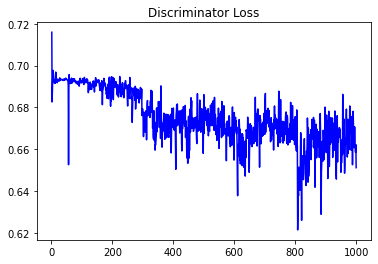

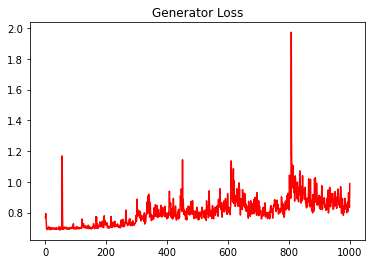

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MAE")
print(mean(ABC_GAN1_metrics[1]))

MAE
0.44356343381252944


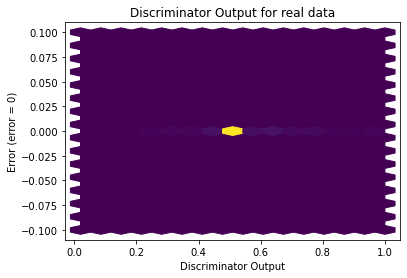

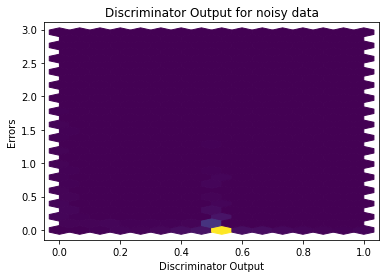

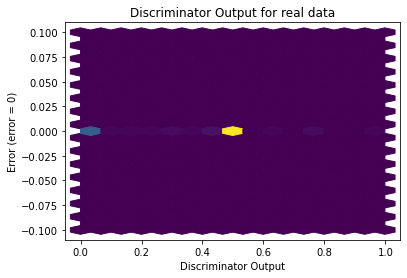

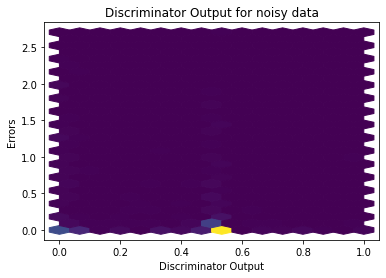

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# mGAN Model with TabNet Generator

In [15]:
gen2 = network.GeneratorTabnet(n_features+1).to(device)
disc2 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen2.parameters(), lr=0.01, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc2.parameters(), lr=0.01, betas=(0.5, 0.999))

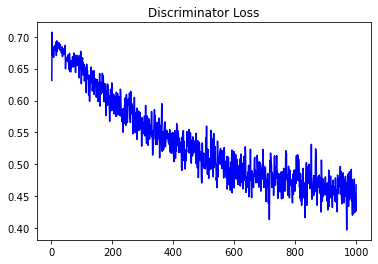

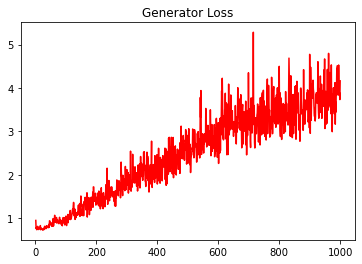

In [16]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc2,gen2,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN2_metrics=ABC_train_test2.test_generator(gen2,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_2 Metrics",ABC_GAN2_metrics)

print("MAE")
print(mean(ABC_GAN2_metrics[1]))

MAE
0.1848844488766889


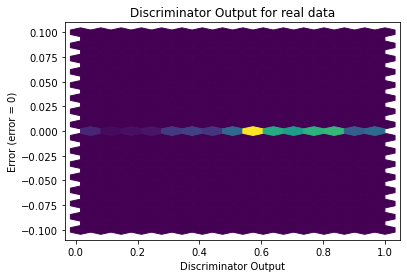

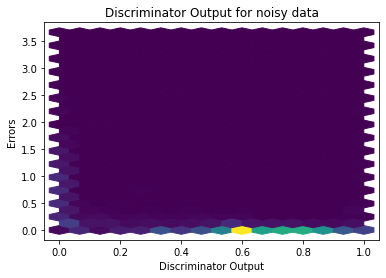

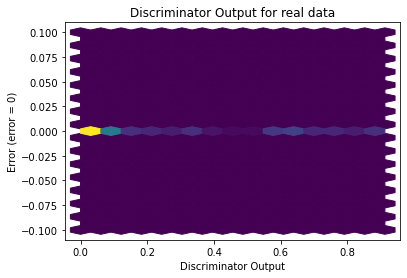

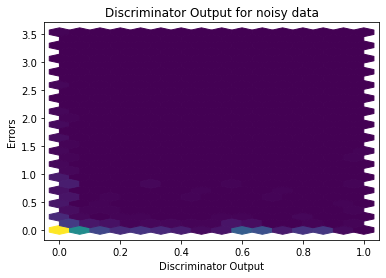

In [18]:
sanityChecks.discProbVsError(train_data,disc2,device)
sanityChecks.discProbVsError(test_data,disc2,device)

# skipGAN Model

In [19]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.01, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.01, betas=(0.5, 0.999))


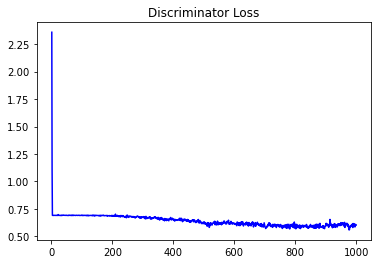

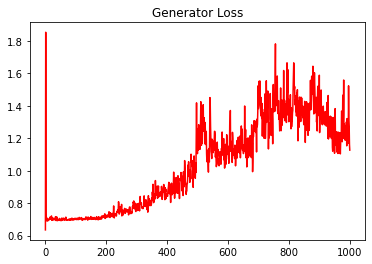

In [20]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [21]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MAE")
print(mean(ABC_GAN3_metrics[1]))

MAE
0.22116348062276694


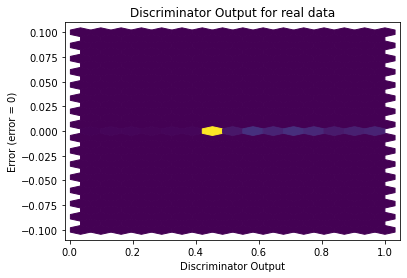

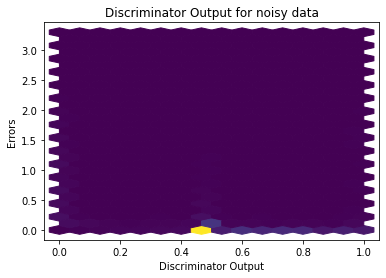

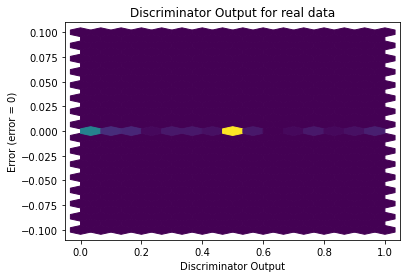

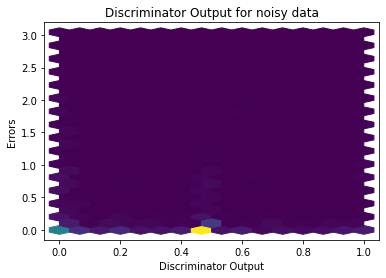

In [22]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

# skipGAN Model with TabNet Generator

In [23]:
#Generator
gen4 = network.GeneratorTabnetskipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc4 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen4.parameters(), lr=0.01, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc4.parameters(), lr=0.01, betas=(0.5, 0.999))


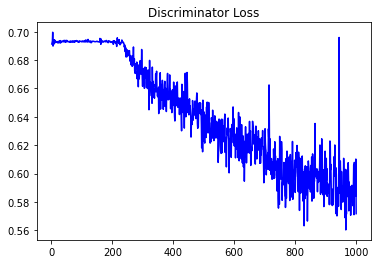

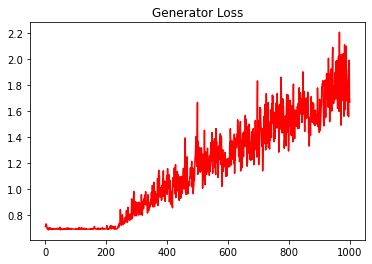

In [24]:
ABC_train_test2.training_GAN_skip_connection(disc4,gen4,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [25]:
ABC_GAN4_metrics=ABC_train_test2.test_generator(gen4,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_4 Metrics",ABC_GAN4_metrics)

print("MAE")
print(mean(ABC_GAN4_metrics[1]))

MAE
0.23253322712821411


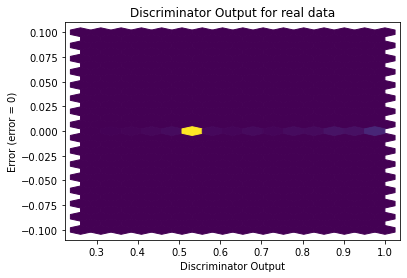

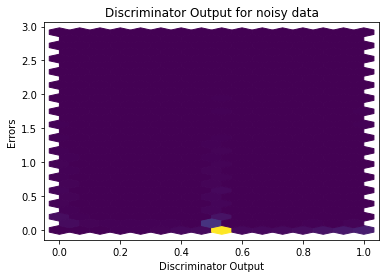

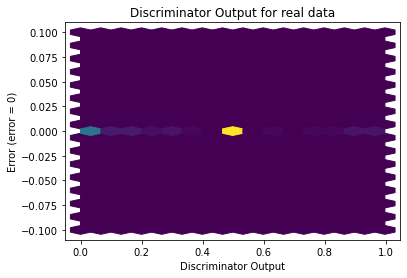

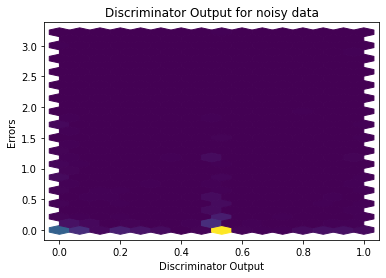

In [26]:
sanityChecks.discProbVsError(train_data,disc4,device)
sanityChecks.discProbVsError(test_data,disc4,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [27]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.3552]], requires_grad=True)


## skipGAN Model Analysis (TabNet Generator) 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [28]:
print("Weight of the node at skip connection")
for name,param in gen4.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.3762]], requires_grad=True)
